In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#INSTALLING NLTK LIBRARIES.

import string
import re
import nltk
import nltk.corpus

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#EDA LIBRARIES.

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

In [4]:
#FEATURE ENGINEERING

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

#RESAMPLING
from imblearn.over_sampling import SMOTE  #balancing the unbalanced dataset.
from collections import Counter


#SPLITTING DATASET
from sklearn.model_selection import train_test_split

In [5]:
#MODEL BUILDING AND EVALUATION.

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Hyper parameter tuning
from sklearn.model_selection  import GridSearchCV

#model metrics 
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

# LOADING DATASET

In [6]:
data = pd.read_csv('Musical_instruments_reviews.csv')

In [7]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [8]:
data.shape

(10261, 9)

In [9]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [10]:
#FILLING THE REVIEWS COLUMN WITH BLANK AS IT MAY BE USEFUL FOR US.
data['reviewText'].fillna('', inplace=True)

In [11]:
#DROPPING THE OTHER NULL VALUES
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [14]:
#CONCATINATING RIVIEW TEXT AND SUMMARY COLUMN.

data['reviews']= data['reviewText']+ data['summary']

In [15]:
#DROPPING THE REVIEWS AND SUMMARY COLUMNS.
data.drop(columns=['reviewText','summary'], inplace=True)

In [16]:
data.describe(include="all")

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
count,10234,10234,10234,10234,10234.000000,1.023400e+04,10234,10234
unique,1428,900,1397,269,NaN,NaN,1570,10234
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013","Not much to write about here, but it does exac..."
freq,42,163,66,6770,NaN,NaN,40,1
mean,NaN,NaN,NaN,NaN,4.488665,1.360518e+09,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894361,3.778812e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343347e+09,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388880e+09,NaN,NaN


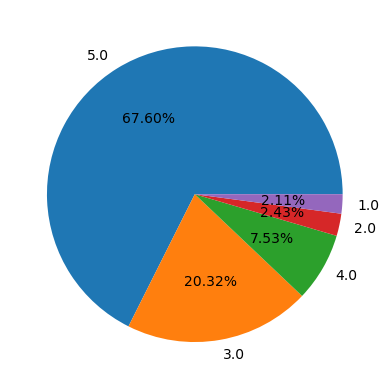

In [17]:
#CREATING THE REVIEW % CHART

plt.pie(data['overall'].value_counts(),labels= data['overall'].unique(), autopct='%1.2f%%')
plt.show()

In [18]:
data.rename(columns={'overall':'review'}, inplace=True)

In [19]:
def reviews(text):
    if text >3.0:
        return('Positive.')
    elif text ==3.0:
        return("Neutral.")
    else:
        return("Negative.")

In [20]:
data['Sentiment']= data['review'].apply( lambda x : reviews(x))

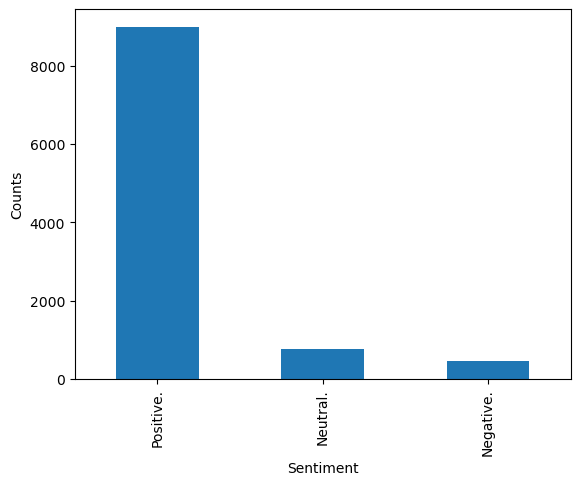

In [21]:
data['Sentiment'].value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.show()

# TEXT PREPROCESSING.

#### TEXT CLEANING.

In [22]:
def text_cleaning(text):
    #lowercasing the text.
    text= text.lower()
    
    #cleaning punctuations in the text.
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text= text.translate(punc)
    
    #Removing numbers in the text.
    text= re.sub(r'\d+','', text)
    
    #Removing possible links
    text= re.sub('https?://\s+|www\.\s+','', text)
    
    #deleting new lines
    text= re.sub('\n','', text)
    
    return text

#### TEXT PREPROCESSING.

In [23]:
#STOPWORDS
stopwords= nltk.corpus.stopwords.words('english')
stopwords.remove('not')

def text_preprocessing(text):
    processed_text= []
    lemmatizer = WordNetLemmatizer()
    
    for i in text.split():
        if i not in stopwords:
            processed_text.append(lemmatizer.lemmatize(i))
        
    return(" ".join(processed_text))

#### APPLYING FUNCTION.

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
data['reviews']= data['reviews'].apply(lambda x : text_cleaning(x))
data['reviews']= data['reviews'].apply(lambda x : text_preprocessing(x))

#### CHECKING FOR POLARITY OF THE  REVIEW COLUMN.

In [26]:
from textblob import TextBlob
data['polarity']= data['reviews'].apply(lambda x :TextBlob(x).sentiment.polarity)

In [27]:
data.head()

,reviewerID,asin,reviewerName,helpful,review,unixReviewTime,reviewTime,reviews,Sentiment,polarity
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive.,0.3500
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive.,0.0000
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive.,0.1675
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive.,0.4250
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive.,0.8000


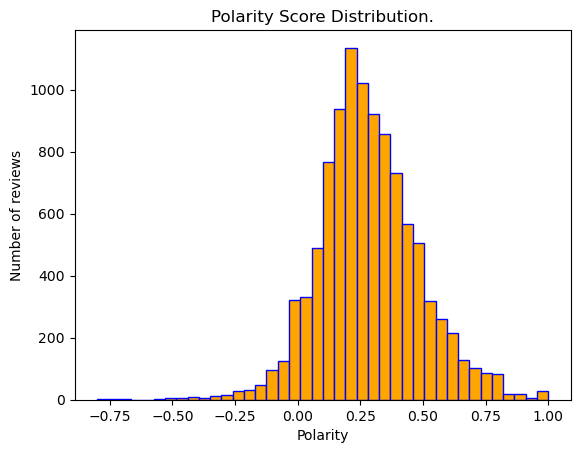

In [28]:
data['polarity'].plot(kind='hist', bins=40, edgecolor= "blue", color="orange")
plt.title("Polarity Score Distribution.")
plt.xlabel("Polarity")
plt.ylabel("Number of reviews")
plt.show()

In [29]:
data['length']=data['reviews'].apply(len)

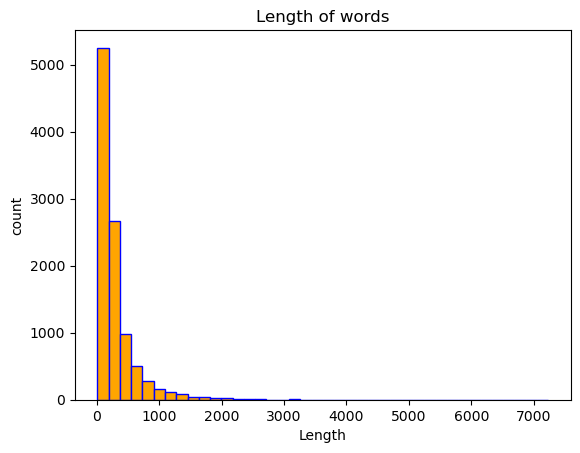

In [30]:
data['length'].plot(kind='hist', bins=40, edgecolor= "blue", color="orange")
plt.title("Length of words")
plt.xlabel("Length")
plt.ylabel("count")
plt.show()

In [31]:
data['word_count']=data['reviews'].apply(lambda x : len(x.split()))

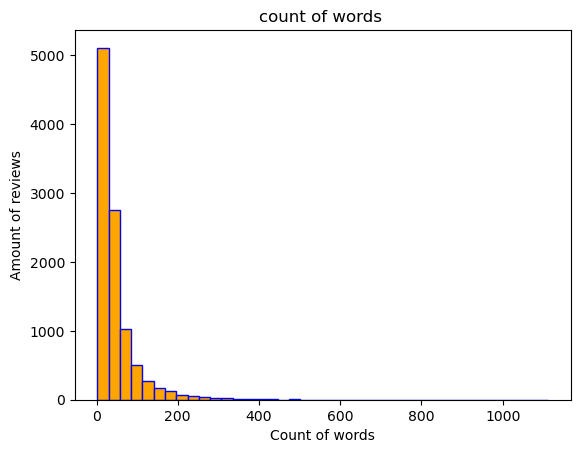

In [32]:
data['word_count'].plot(kind='hist', bins=40, edgecolor= "blue", color="orange")
plt.title("count of words ")
plt.xlabel("Count of words")
plt.ylabel("Amount of reviews")
plt.show()

# N-GRAM ANALYSIS.

In [33]:
def gram_analysis(corpus, gram , N):
    #vectorisation
    Vectorizer= CountVectorizer(stop_words= stopwords, ngram_range= (gram, gram))
    ngrams= Vectorizer.fit_transform(corpus)
    
    #n-gram frequency
    count= ngrams.sum(axis=0)
    #print(count)
    #print()
    
    #List of words
    words =[(word, count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]  #kitne bar wo word aaya hai
    #print(words) 
    #print()
    
    #Sorting Descending with key= count
    words= sorted(words, key = lambda x:x[1], reverse=True)  #sorting on the basis of first index.
    #print(words)
    
    
    return words[:N]

#### Filtering the dataframe based on Sentiments

In [34]:
positive= data[data['Sentiment']=='Positive.'].copy()
negative= data[data['Sentiment']=='Negative.'].copy()
neutral= data[data['Sentiment']=='Neutral.'].copy()

In [35]:
data['Sentiment'].unique()

array(['Positive.', 'Neutral.', 'Negative.'], dtype=object)

### UNIGRAM OF REVIEWS BASED ON SENTIMENTS.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


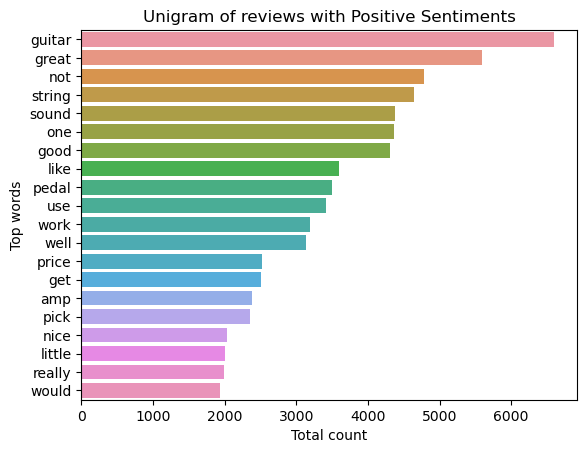

In [36]:
# Finding Unigram
words= gram_analysis(positive['reviews'],1,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Unigram of reviews with Positive Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


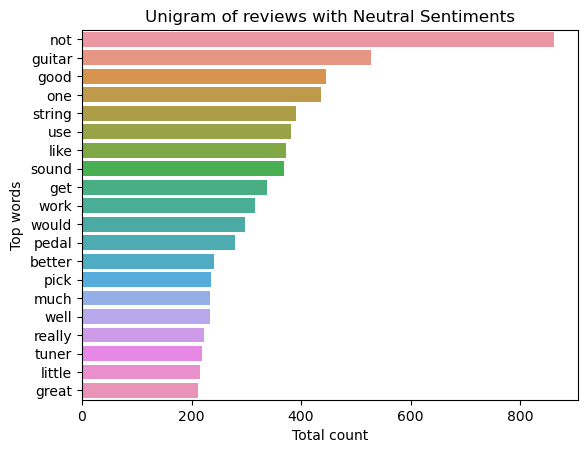

In [37]:
# Finding Unigram
words= gram_analysis(neutral['reviews'],1,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Unigram of reviews with Neutral Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


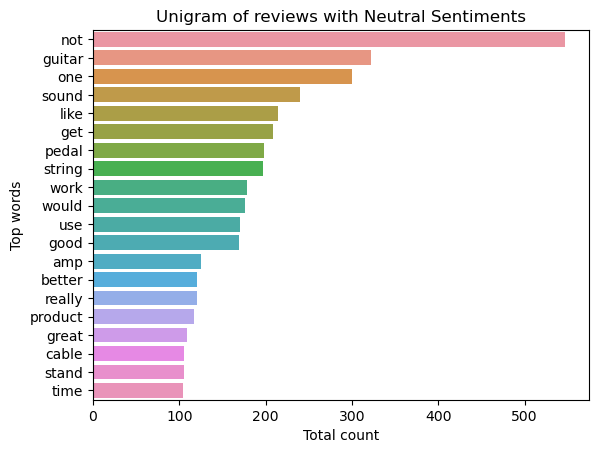

In [38]:
# Finding Unigram
words= gram_analysis(negative['reviews'],1,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Unigram of reviews with Neutral Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

THESE UNIGRAMS ARE NOT REAALLY ACURATE, BECAUSE WE CAN CLEARLY SEE THAT EVEN FOR POSITIVE SENTIMENTS, THE TOP UNIGRAM IS THE WORD GUITAR, WHICH IS AN OBJECT .THOUGH FROM HERE WE MIGHT KNOW THAT THE MOSTL FREQUENTLY BOUGHT ITEMS ARE GUITARS OR THE COMPLEMENT OF IT. wE SHOULD TRY TO FIND THE BIGRSM SND SEE HOW ACCURATE UT CAN DESCRIBE SEAACH SENTIMENT.

### BIGRAM OF REVIEWS BASED ON SENTIMENTS..

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


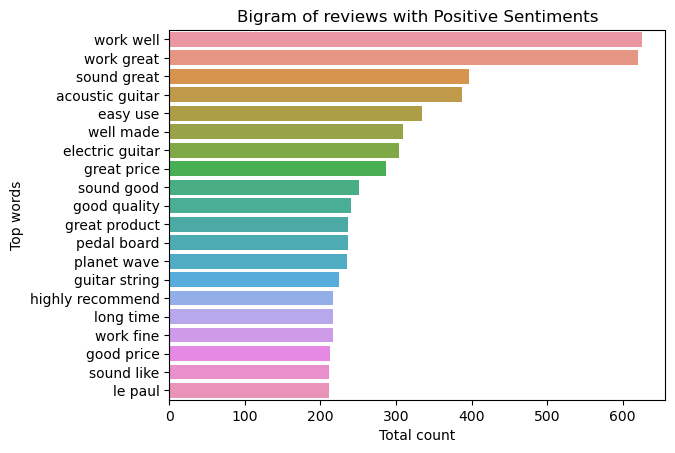

In [43]:
# Finding Bigram.
words= gram_analysis(positive['reviews'],2,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Bigram of reviews with Positive Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


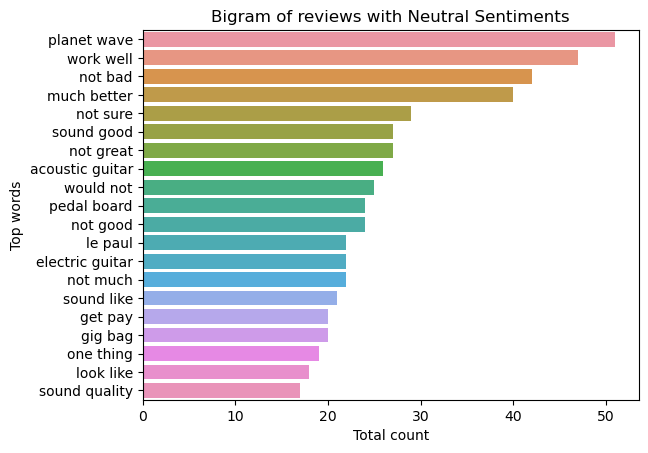

In [44]:
#Finding Bigram
words= gram_analysis(neutral['reviews'],2,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Bigram of reviews with Neutral Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


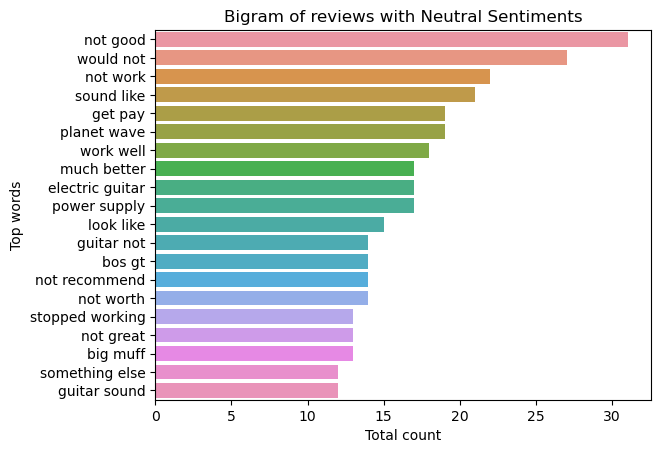

In [45]:
# Finding Bigram
words= gram_analysis(negative['reviews'],2,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Bigram of reviews with Neutral Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

### TRIGRAM OF REVIEWS BASED ON SENTIMENTS.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


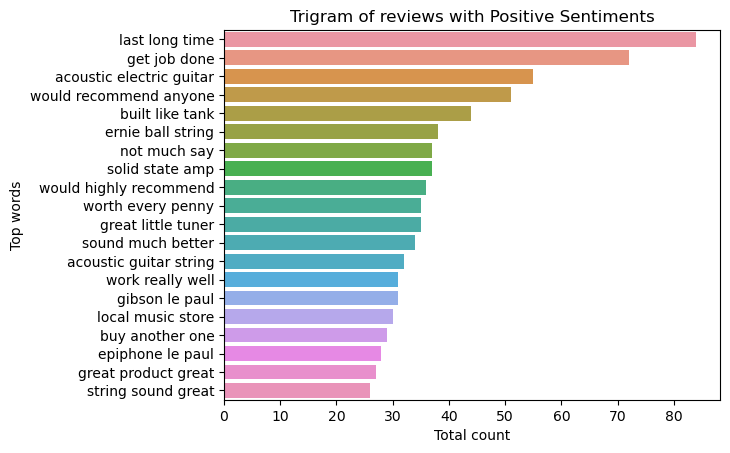

In [46]:
#Finding Trigram.
words= gram_analysis(positive['reviews'],3,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Trigram of reviews with Positive Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


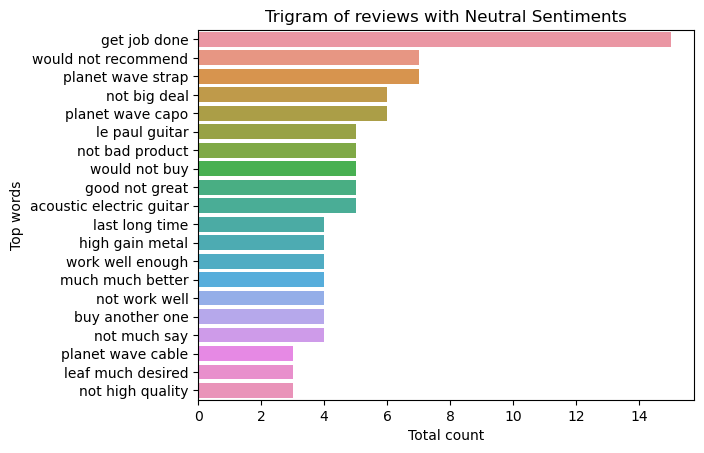

In [47]:
#Finding Trigram
words= gram_analysis(neutral['reviews'],3,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Trigram of reviews with Neutral Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


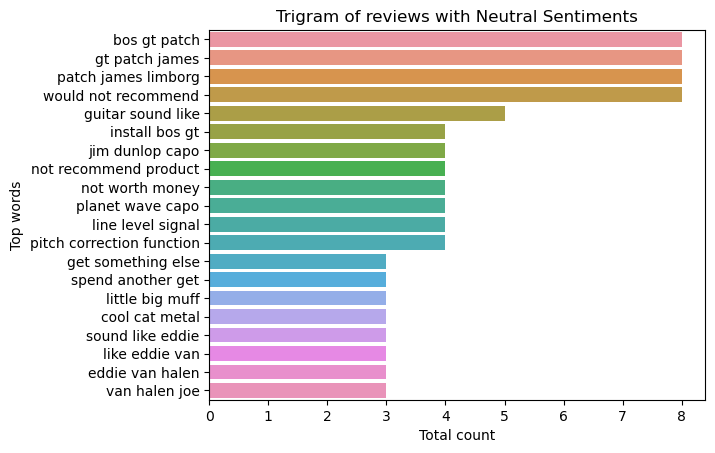

In [48]:
# Finding Trigram
words= gram_analysis(negative['reviews'],3,20)
unigram= pd.DataFrame(words, columns=['word','counts'])

#Visualiztion
sns.barplot(y=unigram['word'], x=unigram['counts'])
plt.title('Trigram of reviews with Neutral Sentiments')
plt.ylabel("Top words")
plt.xlabel("Total count")
plt.show()

## WORDCLOUD

In [49]:
#A word cloud is a visual representation of text data where words from a given dataset are displayed in a graphical 
#manner, and the size of each word is proportional to its frequency or importance in the text.

#### WORD CLOUD FOR POSITIVE SENTIMENT REVIEWS.

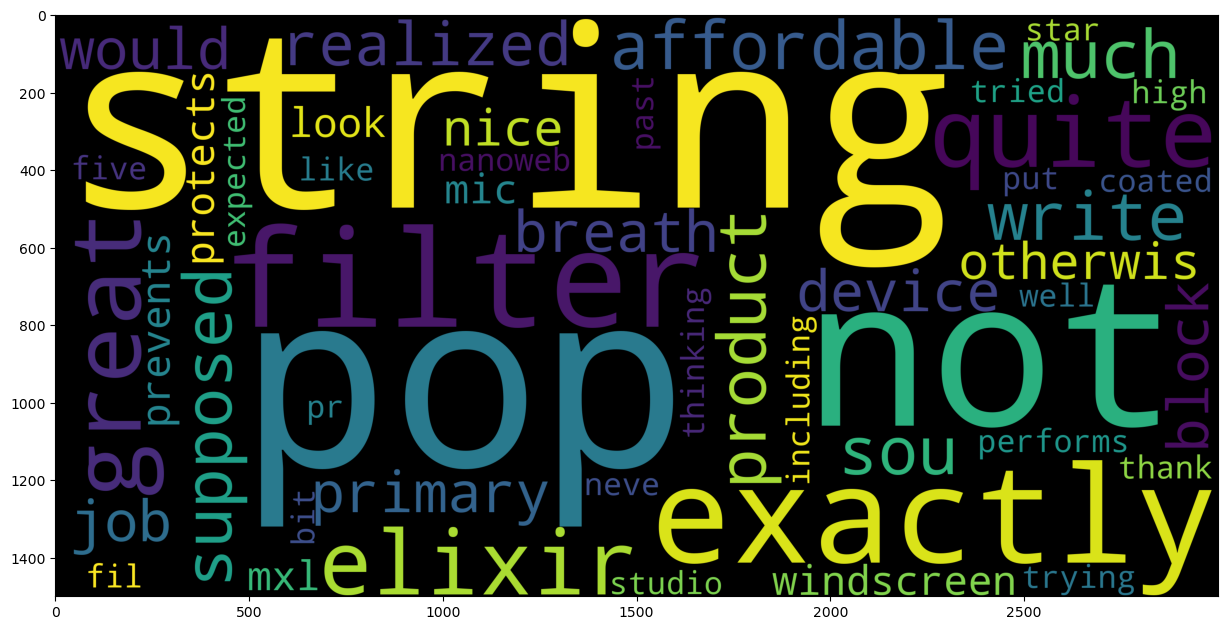

In [51]:
wordcloud= WordCloud(max_words=50, width=3000, height=1500, stopwords= stopwords).generate(str(positive['reviews']))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.show()

#### WORD CLOUD FOR NEGATIVE SENTIMENT REVIEWS.

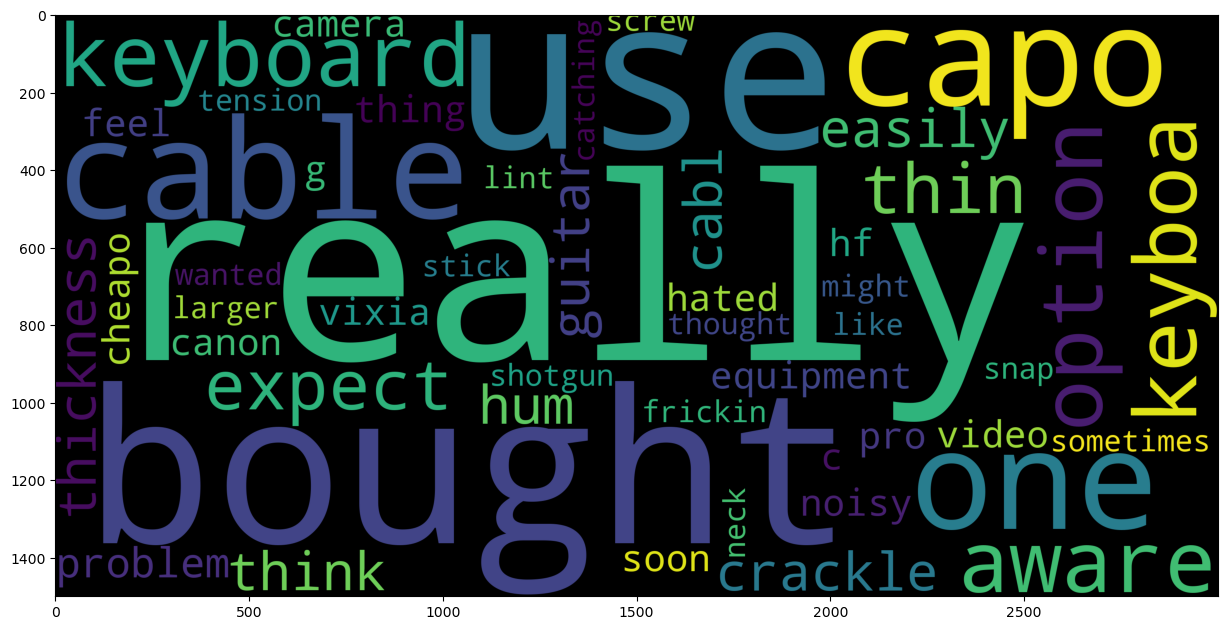

In [52]:
wordcloud= WordCloud(max_words=50, width=3000, height=1500, stopwords= stopwords).generate(str(negative['reviews']))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.show()

#### WORD CLOUD FOR NEUTRAL  SENTIMENT REVIEWS

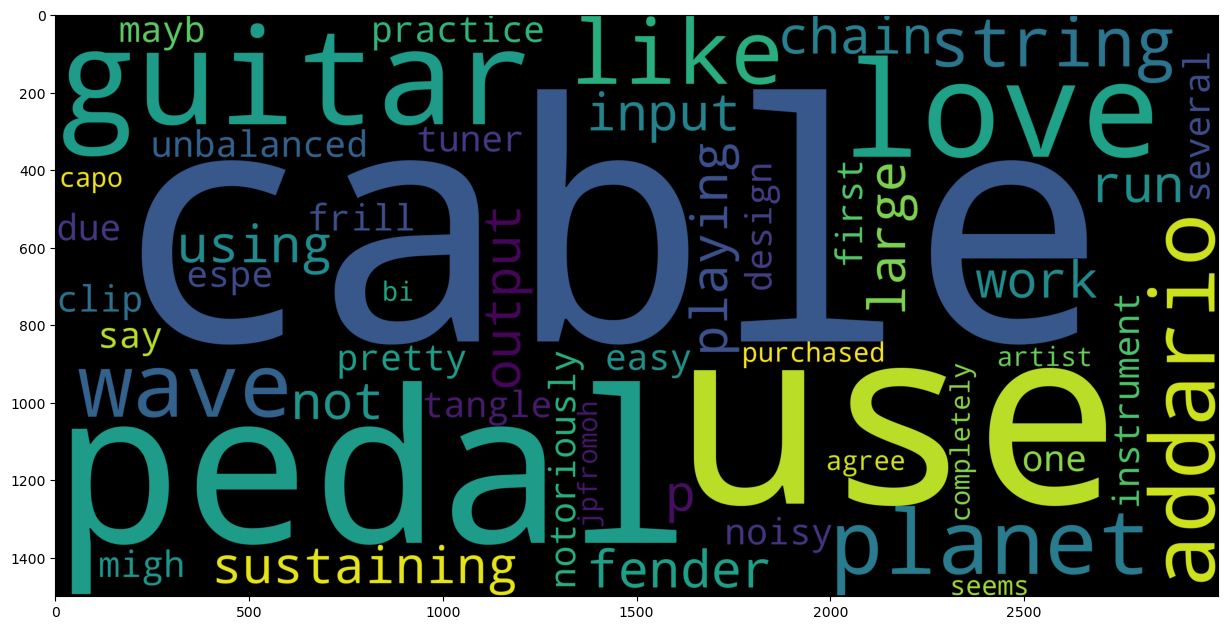

In [54]:
wordcloud= WordCloud(max_words=50, width=3000, height=1500, stopwords= stopwords).generate(str(neutral['reviews']))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.show()

# FEATURE ENGINEERING.

In [58]:
#Dropping unncessary columns.
data= data[['reviews','Sentiment']]
data.head()

,reviews,Sentiment
0,not much write exactly supposed filter pop sou...,Positive.
1,product exactly quite affordable not realized ...,Positive.
2,primary job device block breath would otherwis...,Positive.
3,nice windscreen protects mxl mic prevents pop ...,Positive.
4,pop filter great look performs like studio fil...,Positive.


In [61]:
#ENCODING OUR TARGET VARIABLE.
encoder= LabelEncoder()
data['Sentiment']=encoder.fit_transform(data['Sentiment'])

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [64]:
data.head()
print(data['Sentiment'].value_counts())

Sentiment
2    8998
1     771
0     465
Name: count, dtype: int64


In [66]:
#WE HAVE  SUCCESSFULLY ENCODED OUR  SENTIMENTS INTO NUMBERS SO THAT OUR MODEL CAN EASILY FIGURE  IT OUT.

#POSITIVE-2
#NEGATIVE-1
#NEUTRAL-0

#NOW WE NEED OUR DATA IN THE FORM OF TOKENS , AND NEED TO GIVE WEITAGE TO EACH WORD, WE CNA DO THIS VIA TFIDF VECTORIZER

#### TF-IDF VECTORIZER.

In [77]:
#DEFINING OUR VECTORIZER WITH TOTAL WORDS OF 5000 AND WITH BIAGRAM MODEL.
TF_IDF= TfidfVectorizer(max_features=5000, ngram_range= (2,2))

#FITTING AND TRSNFORMING OUR REVIEWS INTO A MATRIX OF WEIGHTED WORDS.
#THIS WILL BE OUR INDEPENDENT FEATURES.
X= TF_IDF.fit_transform(data['reviews'])

#CHECK OUR MATRIX SHAPE
X.shape

#DECLEARING OUR TARGET VARIABLE.
y= data['Sentiment']

WE HAVE SUCCESSFULLY TRANSFORMED  OUR REVIEWS WITH TF-IDF VECTOR INTO TOP 5000 BIAGRAM WORDS. NOW , AS OUR DATA IS LITTLE IMBALANCED , WE NEED TO BALANCE IT BEFORE GOING TO MODEL BUILDING PROCESS.

#### RESAMPLING OUR DATASET.

THERE ARE MANY WAYS TO RESHAMPLE THE DATA SUCH AS MOTE AND BOOTSTRAP METHODS. WE WILL USE SMOTE(SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE) THAT WILL RANDOMLY GEENRATE NEW REPLICATES OF OUR  UNDERSAMPLING DATA TO  BALANCE OUR DATASET.

In [82]:
y.value_counts()

Sentiment
2    8998
1     771
0     465
Name: count, dtype: int64

In [83]:
Balancer= SMOTE(random_state=42)
x_final, y_final= Balancer.fit_resample(X,y)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [84]:
y_final.value_counts()

Sentiment
2    8998
1    8998
0    8998
Name: count, dtype: int64

# PREPARING, TRAINING AND MODEL EVALUATION.

In [90]:
#SPLITTING OUR DATASET.
xtrain, xtest, ytrain, ytest= train_test_split(x_final, y_final, test_size=0.25, random_state=42)
print(x_final.shape, xtrain.shape, xtest.shape)
print(y_final.shape, ytrain.shape, ytest.shape)

(26994, 5000) (20245, 5000) (6749, 5000)
(26994,) (20245,) (6749,)


In [115]:
#MODEL BUILDING.
dtree= DecisionTreeClassifier()
logreg= LogisticRegression()
svc= SVC()
forest = RandomForestClassifier()
bayes=BernoulliNB()
KNN= KNeighborsClassifier()

models=[dtree, logreg, svc, forest, bayes, KNN]
model_dict={0:'Decision Tree',1:'Logistic Regression',2:'SVC',3:'Random Forest',4:"Naive Bayes",5:"K-Neighbors"}

dic={}
for i, mod in enumerate(models):
    dic[model_dict[i]]= cross_val_score(mod,xtrain, ytrain, cv=10, scoring='accuracy').mean()

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_arra

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [125]:
dic

{'Decision Tree': 0.8744877275167131,
 'Logistic Regression': 0.8880713658322354,
 'SVC': 0.982415068559996,
 'Random Forest': 0.9044208998194506,
 'Naive Bayes': 0.866288488752257,
 'K-Neighbors': 0.6369969745766848}

In [122]:
#TRINING THE sVC MODEL AS IT GIVES THE BEST ACCURACY.
svc.fit(xtrain, ytrain)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC()

In [127]:
#CHECKING ROR OVERFITTING OR UNDERFITTING BY CHECKING TRAINING AND TESTING ACCURACY.
test= svc.predict(xtest)
print('Test Accuracy:',accuracy_score(ytest, test))
print('Train Accuracy:', accuracy_score(ytrain, svc.predict(xtrain)))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Test Accuracy: 0.9805897169951104
Train Accuracy: 0.9876512719189924


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [172]:
#CONFUSION MATRIX
Confusion_matrix= confusion_matrix(ytest, test)
Confusion_matrix= pd.DataFrame(Confusion_matrix, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [173]:
Confusion_matrix

,negative,neutral,positive
negative,2238,6,1
neutral,75,2138,16
positive,30,3,2242


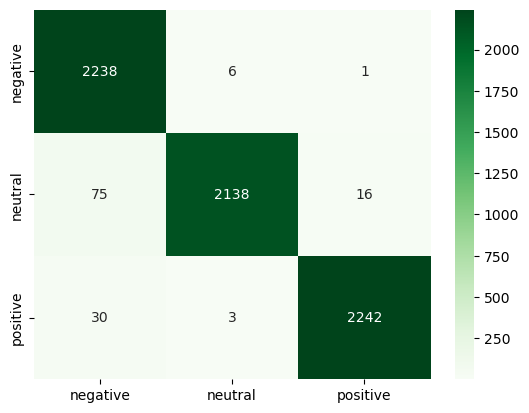

In [174]:
#CLASSIFICATION REPORT.
sns.heatmap(Confusion_matrix, annot=True, cmap='Greens',fmt='d',robust=True)
plt.show()

In [175]:
print(classification_report(ytest, test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2245
           1       1.00      0.96      0.98      2229
           2       0.99      0.99      0.99      2275

    accuracy                           0.98      6749
   macro avg       0.98      0.98      0.98      6749
weighted avg       0.98      0.98      0.98      6749



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
